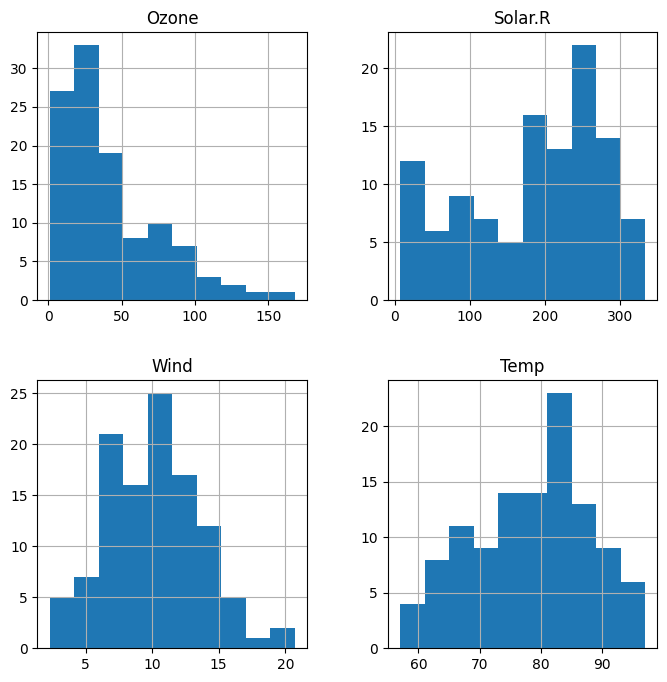

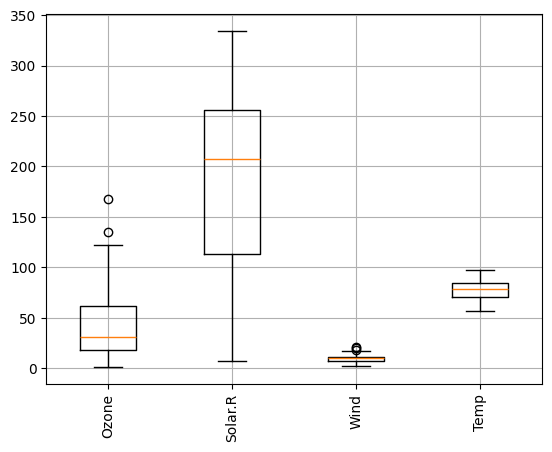

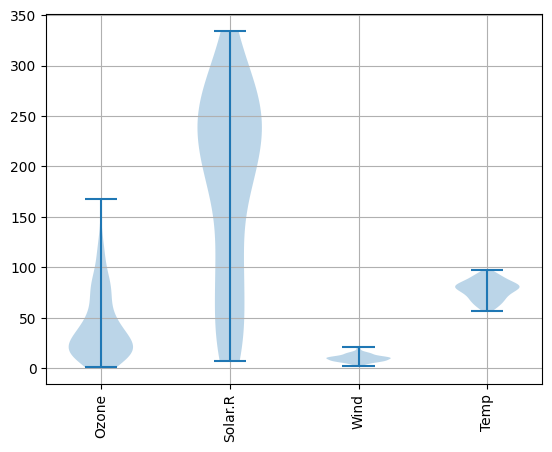

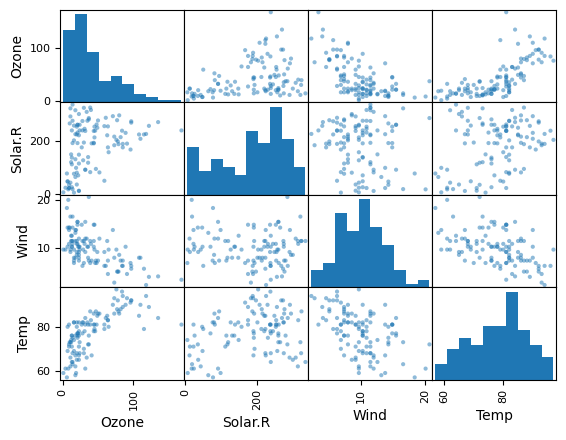

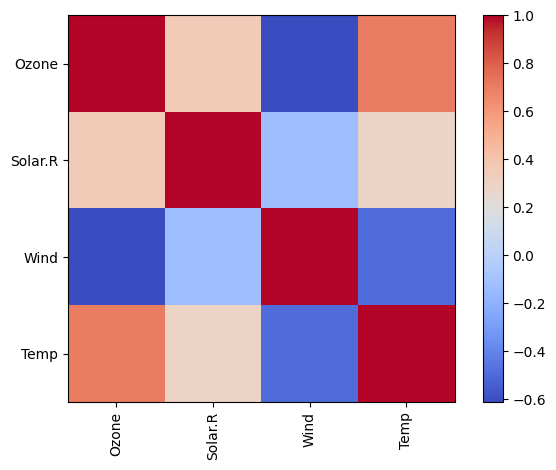

In [33]:
# 課題1
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("airquality.txt", sep="\t", index_col=0)
df.head()
df.iloc[0, 0]
df.iloc[10:20, 0:5]
df.T
df.T.iloc[2, 1]
df.describe()
df.apply(lambda x : (x-x.mean())/x.std(), axis=0)
df.corr()
# 7ヒストグラム
selected_columns = df.columns[0:4]
df[df.columns[0:4]].hist(figsize=(8, 8))
plt.show()

# 8ボックスプロット
plt.boxplot(df[selected_columns].values.T.tolist())
plt.xticks(range(1, len(selected_columns)+1), selected_columns, rotation=90)
plt.grid()
plt.show()

# 9バイオリンプロット
plt.violinplot(df[selected_columns].values.T.tolist())
plt.xticks(range(1, len(selected_columns) + 1), selected_columns, rotation=90)
plt.grid()
plt.show()

# 10散布図行列
from pandas import plotting
plotting.scatter_matrix(df[selected_columns])
plt.show()

# 11相関行列をヒートマップで表示
import numpy as np
corrcoef = df[selected_columns].corr()
plt.imshow(corrcoef, interpolation='nearest', cmap='coolwarm')
plt.colorbar()
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, corrcoef.index, rotation=90)
plt.yticks(tick_marks, corrcoef.index)
plt.tight_layout()
plt.show()

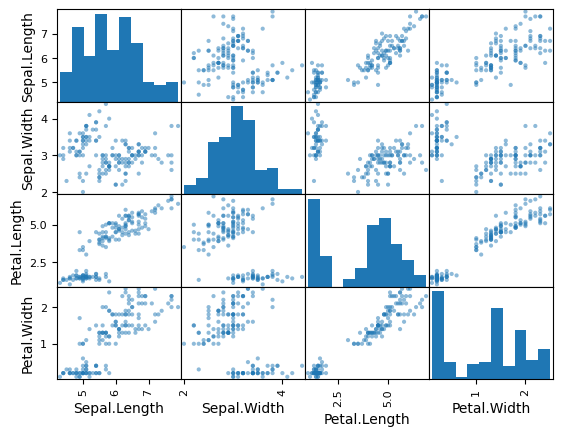

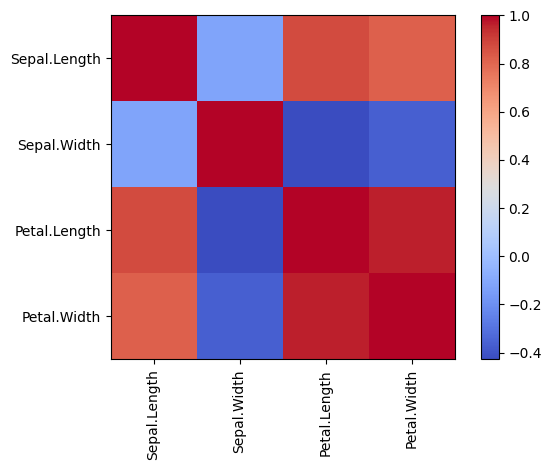

In [ ]:
# 課題2
df = pd.read_csv("iris.txt", sep="\t", index_col=0)

selected_columns = df.columns[0:4]
plotting.scatter_matrix(df[selected_columns])
plt.show()

corrcoef = df[selected_columns].corr()
plt.imshow(corrcoef, interpolation='nearest', cmap='coolwarm')
plt.colorbar()
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, corrcoef.index, rotation=90)
plt.yticks(tick_marks, corrcoef.index)
plt.tight_layout()
plt.show()

# がく片の長さが長ければ、花びらの長さや花びらの幅が長くなる一方、がく片の幅は短くなる

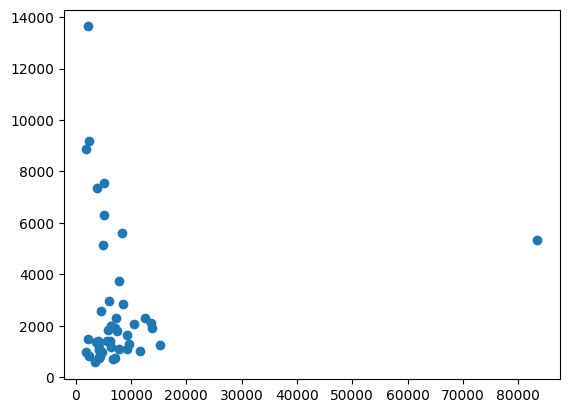

In [60]:
# 課題3
import pandas as pd
excel = pd.ExcelFile("Teikoku-Shoin-Japan.xlsx")

area_sheet = excel.parse(excel.sheet_names[0], header=None)
population_sheet = excel.parse(excel.sheet_names[1], header=None)
# print(area_sheet)

area = area_sheet.iloc[2:49, 3].reset_index(drop=True)
population = population_sheet.iloc[2:49, 2].reset_index(drop=True)
plt.scatter(area, population)

# 日本のほとんどの県が面積が北海道と比べて1/8ほどの面積で、面積と人口に強い相関関係は見られない。

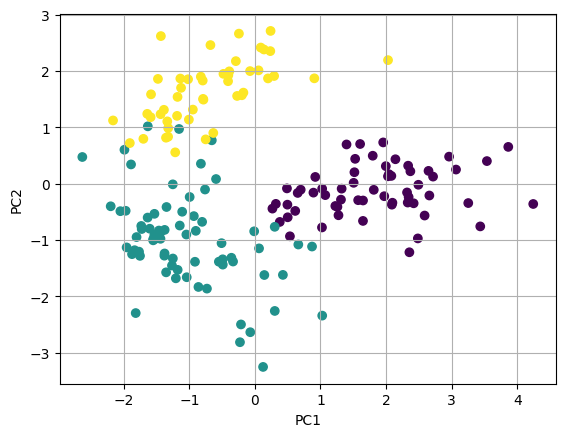

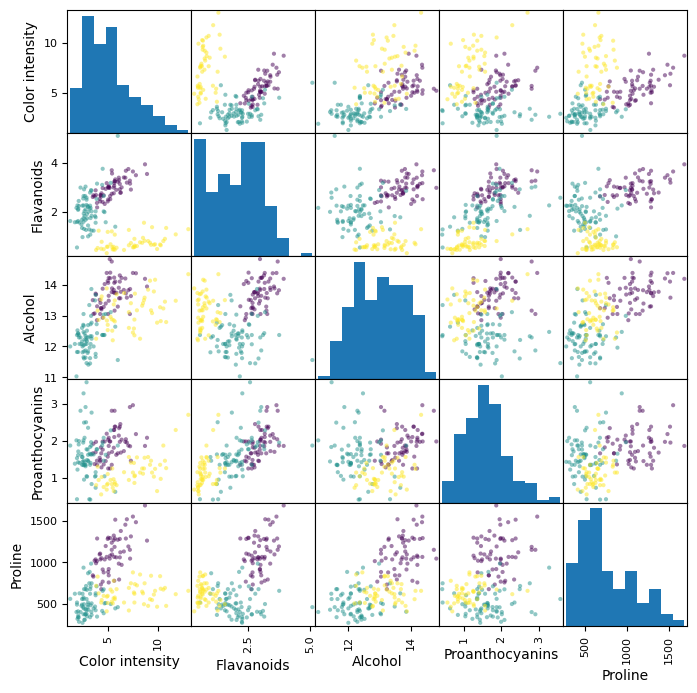

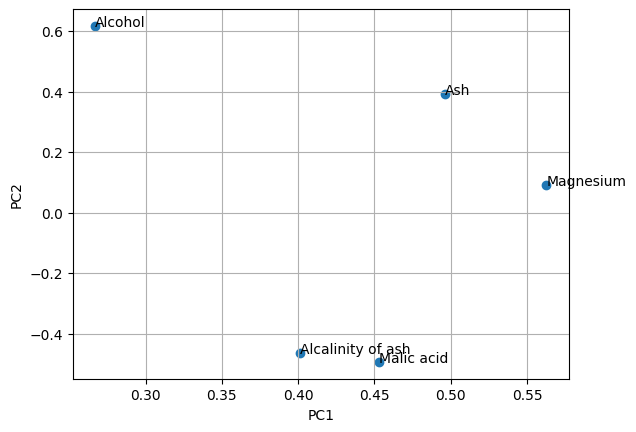

In [ ]:
# 課題4
from sklearn.decomposition import PCA
df2 = pd.read_csv("wine.txt", sep="\t", index_col=0)
df3 = df[['Color intensity', 'Flavanoids', 'Alcohol', 'Proanthocyanins', 'Proline']]
dfs = df3.apply(lambda x : (x-x.mean())/x.std(), axis=0)

pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs)

# part1
plt.scatter(feature[:, 0], feature[:, 1], c = list(df2.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# part2
plotting.scatter_matrix(df3, figsize=(8, 8), c=list(df2.iloc[:, 0]))
plt.show()

# part3
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x+1) for x in range(len(dfs.columns))])

# part4
for x, y, name in zip(pca.components_[0], pca.components_[1], df2.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# part5
"""
マグネシウムの量の寄与が高く、アルコールの濃度はワインの品種を特定するのに有効ではない
"""


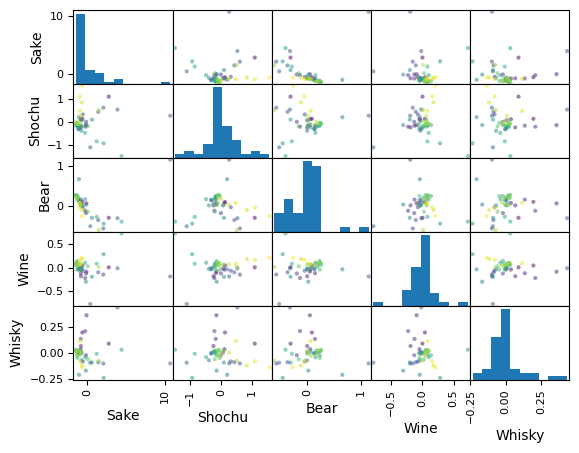

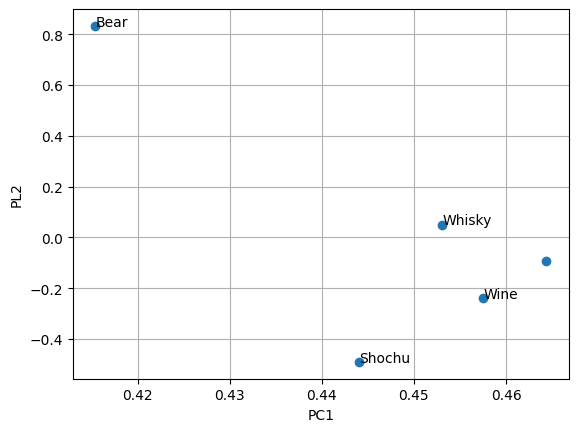

In [103]:
# 課題5
df2 = pd.read_csv("sake_data.txt", sep="\t", index_col=0)
dfs = df2.apply(lambda x : (x-x.mean())/x.std(), axis=0)


pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs)
selected_columns = df2.columns

indexes = []
for i in range(len(df2.index)):
    indexes.append(i)

# 散布図行列
plotting.scatter_matrix(pd.DataFrame(feature, columns=selected_columns), c=indexes)
plt.show()
# 主成分の寄与
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x+1) for x in range(len(dfs.columns))])
# 特徴量の寄与
for x, y, name in zip(pca.components_[0], pca.components_[1], df2.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PL2")
plt.show()